# Welcome to Time Series! #

**Forecasting** is perhaps the most common application of machine learning in the real world. Businesses forecast product demand, governments forecast economic and population growth, meteorologists forecast the weather. The understanding of things to come is a pressing need across science, government, and industry (not to mention our personal lives!), and practitioners in these fields are increasingly applying machine learning to address this need.

**预测**可能是机器学习在现实世界中最常见的应用。企业预测产品需求，政府预测经济和人口增长，气象学家预测天气。对未来事物的了解是科学、政府和工业领域的迫切需要（更不用说我们的个人生活了！），这些领域的从业人员正越来越多地应用机器学习来满足这一需求。

Time series forecasting is a broad field with a long history. This course focuses on the application of modern machine learning methods to time series data with the goal of producing the most accurate predictions. The lessons in this course were inspired by winning solutions from past Kaggle forecasting competitions but will be applicable whenever accurate forecasts are a priority.

时间序列预测是一个历史悠久的广泛领域。本课程的重点是将现代机器学习方法应用于时间序列数据，目的是做出最准确的预测。本课程的灵感来源于过去 Kaggle 预测比赛中的获奖解决方案，但也适用于任何以准确预测为优先事项的情况。

After finishing this course, you'll know how to:
- engineer features to model the major time series components (*trends*, *seasons*, and *cycles*),
- visualize time series with many kinds of *time series plots*,
- create forecasting *hybrids* that combine the strengths of complementary models, and
- adapt machine learning methods to a variety of forecasting tasks.

完成本课程后，您将知道如何
- 设计建模主要时间序列成分（*趋势*、*季节*和*周期*）的功能、
- 使用多种*时间序列图*可视化时间序列、
- 创建结合互补模型优势的预测混合模型，以及
- 使机器学习方法适应各种预测任务。

As part of the exercises, you'll get a chance to participate in our [Store Sales - Time Series Forecasting](https://www.kaggle.com/c/29781) Getting Started competition. In this competition, you're tasked with forecasting sales for *Corporación Favorita* (a large Ecuadorian-based grocery retailer) in almost 1800 product categories.

作为练习的一部分，您将有机会参加我们的[商店销售--时间序列预测](https://www.kaggle.com/c/29781) 入门竞赛。在比赛中，您的任务是预测*Corporación Favorita*（厄瓜多尔一家大型杂货零售商）近 1800 种产品类别的销售情况。

# What is a Time Series? #

The basic object of forecasting is the **time series**, which is a set of observations recorded over time. In forecasting applications, the observations are typically recorded with a regular frequency, like daily or monthly.

预测的基本对象是**时间序列**，即一组随时间记录的观测数据。在预测应用中，观测数据通常以固定频率记录，如每天或每月。

In [1]:

import pandas as pd

df = pd.read_csv(
    "./input/book_sales.csv",
    index_col='Date',
    parse_dates=['Date'],
).drop('Paperback', axis=1)

df.head()

,Hardcover
Date,
2000-04-01,139
2000-04-02,128
2000-04-03,172
2000-04-04,139
2000-04-05,191


This series records the number of hardcover book sales at a retail store over 30 days. Notice that we have a single column of observations `Hardcover` with a time index `Date`.

该序列记录了一家零售店 30 天内精装书的销售数量。请注意，我们只有一列带有时间索引 "日期 "的观测值 "精装"。

# Linear Regression with Time Series #

For the first part of this course, we'll use the linear regression algorithm to construct forecasting models. Linear regression is widely used in practice and adapts naturally to even complex forecasting tasks.

在本课程的第一部分，我们将使用线性回归算法来构建预测模型。线性回归在实践中应用广泛，即使是复杂的预测任务也能自然地适应。

The **linear regression** algorithm learns how to make a weighted sum from its input features. For two features, we would have:

**线性回归**算法学习如何对输入特征进行加权求和。对于两个特征，我们可以得出

```
target = weight_1 * feature_1 + weight_2 * feature_2 + bias
```

During training, the regression algorithm learns values for the parameters `weight_1`, `weight_2`, and `bias` that best fit the `target`. (This algorithm is often called *ordinary least squares* since it chooses values that minimize the squared error between the target and the predictions.) The weights are also called *regression coefficients* and the `bias` is also called the *intercept* because it tells you where the graph of this function crosses the y-axis.

在训练过程中，回归算法会学习最适合`target`的参数 `weight_1`、`weight_2`和`bias`的值。（这种算法通常被称为*普通最小二乘法*，因为它选择的值能使目标值与预测值之间的平方误差最小）。权重也被称为*回归系数*，`bias`也被称为*截距*，因为它告诉你这个函数的图形与Y 轴的交叉点。

### Time-step features

There are two kinds of features unique to time series: time-step features and lag features.

有两种时间序列特有的特征：时间步长特征和滞后特征。

Time-step features are features we can derive directly from the time index. The most basic time-step feature is the **time dummy**, which counts off time steps in the series from beginning to end.

时间步长特征是我们可以直接从时间指数中得出的特征。最基本的时间步长特征是**时间虚拟**，它计算序列中从开始到结束的时间步长。

In [2]:
import numpy as np

df['Time'] = np.arange(len(df.index))

df.head()

,Hardcover,Time
Date,,
2000-04-01,139,0
2000-04-02,128,1
2000-04-03,172,2
2000-04-04,139,3
2000-04-05,191,4


Linear regression with the time dummy produces the model:

利用时间虚拟变量进行线性回归，得出模型：

```
target = weight * time + bias
```

The time dummy then lets us fit curves to time series in a *time plot*, where `Time` forms the x-axis.

通过时间虚拟变量，我们可以在*时间图*中将曲线拟合到时间序列上，其中`时间`构成 x 轴。

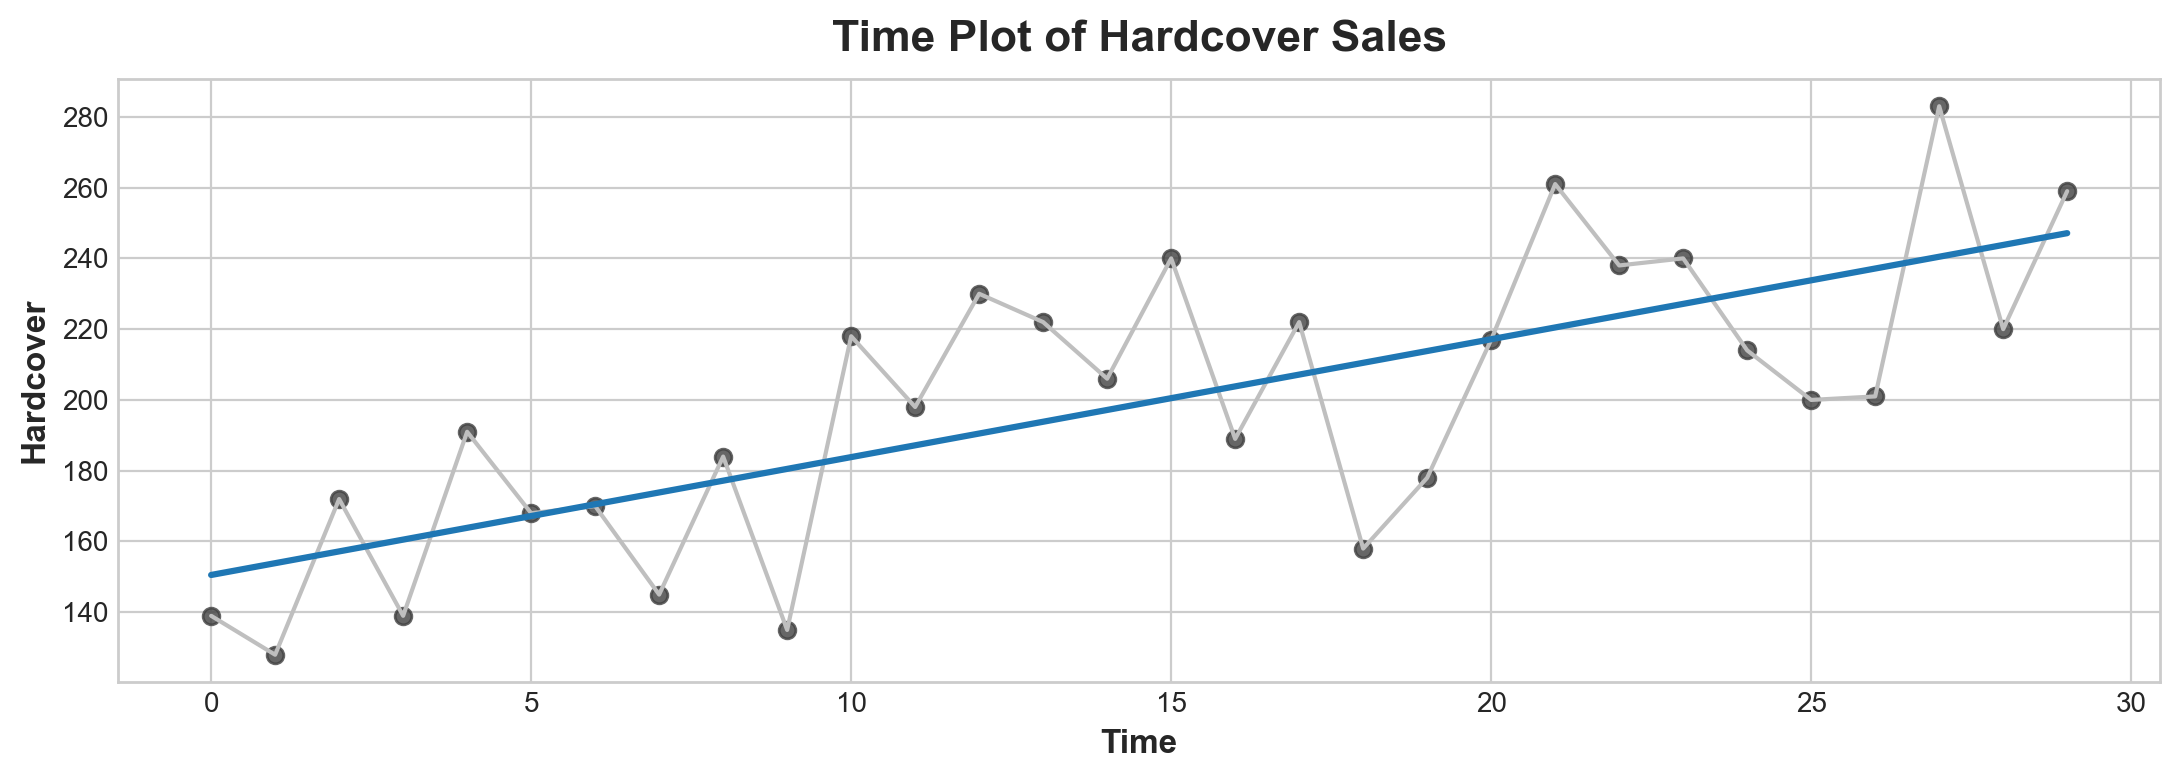

In [4]:

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-v0_8-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('Time', 'Hardcover', data=df, color='0.75')
ax = sns.regplot(x='Time', y='Hardcover', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Hardcover Sales');

Time-step features let you model **time dependence**. A series is time dependent if its values can be predicted from the time they occured. In the *Hardcover Sales* series, we can predict that sales later in the month are generally higher than sales earlier in the month.

时间步长特征可让您模拟**时间依赖性**。如果一个序列的值可以根据其发生的时间进行预测，那么这个序列就是与时间相关的。在*精装书销售*系列中，我们可以预测本月下旬的销售额通常高于本月上旬的销售额。

### Lag features

To make a **lag feature** we shift the observations of the target series so that they appear to have occured later in time. Here we've created a 1-step lag feature, though shifting by multiple steps is possible too.

要制作**滞后特征**，我们需要移动目标序列的观测值，使其看起来发生在较晚的时间。在这里，我们创建了一个 1 级滞后特征，当然也可以进行多级移动。

In [5]:
df['Lag_1'] = df['Hardcover'].shift(1)
df = df.reindex(columns=['Hardcover', 'Lag_1'])

df.head()

,Hardcover,Lag_1
Date,,
2000-04-01,139,NaN
2000-04-02,128,139.0
2000-04-03,172,128.0
2000-04-04,139,172.0
2000-04-05,191,139.0


Linear regression with a lag feature produces the model:

带有滞后特征的线性回归产生了模型：

```
target = weight * lag + bias
```

So lag features let us fit curves to *lag plots* where each observation in a series is plotted against the previous observation.

因此，滞后特征可以让我们将曲线拟合到*滞后图*中，在*滞后图*中，序列中的每个观测值都与前一个观测值相对应。

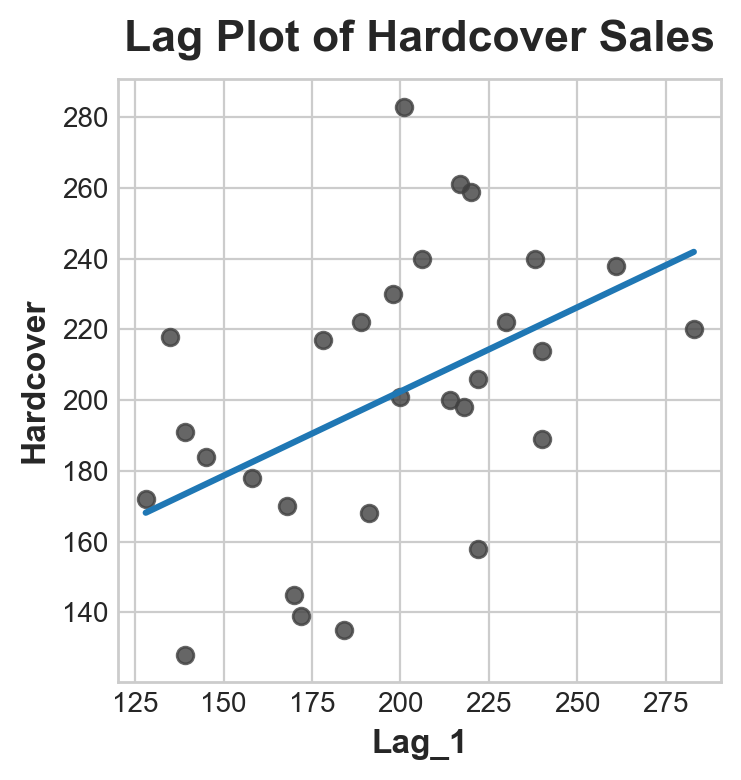

In [6]:
fig, ax = plt.subplots()
ax = sns.regplot(x='Lag_1', y='Hardcover', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of Hardcover Sales');

You can see from the lag plot that sales on one day (`Hardcover`) are correlated with sales from the previous day (`Lag_1`). When you see a relationship like this, you know a lag feature will be useful.

从滞后图中可以看出，某一天（`Hardcover`）的销售额与前一天（`Lag_1`）的销售额相关。当您看到这样的关系时，您就知道滞后功能会很有用。


More generally, lag features let you model **serial dependence**. A time series has serial dependence when an observation can be predicted from previous observations. In *Hardcover Sales*, we can predict that high sales on one day usually mean high sales the next day.


更一般地说，滞后特征可以让你模拟**序列依赖性**。当一个观测值可以从以前的观测值预测出来时，时间序列就具有序列依赖性。在*精装书销售*中，我们可以预测某一天的高销售额通常意味着第二天的高销售额。

---

Adapting machine learning algorithms to time series problems is largely about feature engineering with the time index and lags. For most of the course, we use linear regression for its simplicity, but these features will be useful whichever algorithm you choose for your forecasting task.

将机器学习算法应用于时间序列问题在很大程度上涉及到时间指数和滞后的特征工程。在课程的大部分内容中，我们使用线性回归，因为它简单易用，但无论您选择哪种算法来完成预测任务，这些特征都将非常有用。

# Example - Tunnel Traffic #

*Tunnel Traffic* is a time series describing the number of vehicles traveling through the Baregg Tunnel in Switzerland each day from November 2003 to November 2005. In this example, we'll get some practice applying linear regression to time-step features and lag features.

*隧道交通*是一个时间序列，描述了 2003 年 11 月至 2005 年 11 月期间每天通过瑞士巴雷格隧道的车辆数量。在本例中，我们将对时间步长特征和滞后特征应用线性回归进行一些练习。

The hidden cell sets everything up.

隐藏的单元格设置了一切。

In [8]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

simplefilter("ignore")  # ignore warnings to clean up output cells

# Set Matplotlib defaults
plt.style.use("seaborn-v0_8-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'


# Load Tunnel Traffic dataset
data_dir = Path("./input/")
tunnel = pd.read_csv(data_dir / "tunnel.csv", parse_dates=["Day"])

# Create a time series in Pandas by setting the index to a date
# column. We parsed "Day" as a date type by using `parse_dates` when
# loading the data.
tunnel = tunnel.set_index("Day")

# By default, Pandas creates a `DatetimeIndex` with dtype `Timestamp`
# (equivalent to `np.datetime64`, representing a time series as a
# sequence of measurements taken at single moments. A `PeriodIndex`,
# on the other hand, represents a time series as a sequence of
# quantities accumulated over periods of time. Periods are often
# easier to work with, so that's what we'll use in this course.
tunnel = tunnel.to_period()

tunnel.head()

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


### Time-step feature

Provided the time series doesn't have any missing dates, we can create a time dummy by counting out the length of the series.

如果时间序列中没有缺失的日期，我们就可以通过计算序列的长度来创建一个假时间。